# 3 layer NN with Deep Learning framework

In [68]:
import os
import tensorflow as tf
import datetime
import numpy as np
import cv2
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
%matplotlib inline
from matplotlib import pyplot as plt

In [69]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [70]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64, activation='relu', input_shape=(784, 1)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
"""
#log_dir = "C:/Users/leegu/logs/2-layer_CNN-with-framework/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "C:/Users/leegu/logs/2-layer_NN/for_report"

try:
    os.stat(log_dir)
except:
    os.mkdir(log_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=100000000)
model.fit(train_images,
          train_labels,
          epochs=5,
          callbacks=[tensorboard_callback],
          validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
"""

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.6874 - accuracy: 0.8136 - val_loss: 0.3263 - val_accuracy: 0.9066
Epoch 2/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3000 - accuracy: 0.9143 - val_loss: 0.2601 - val_accuracy: 0.9243
Epoch 3/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2483 - accuracy: 0.9285 - val_loss: 0.2266 - val_accuracy: 0.9334
Epoch 4/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2161 - accuracy: 0.9371 - val_loss: 0.1979 - val_accuracy: 0.9422
Epoch 5/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.1925 - accuracy: 0.9442 - val_loss: 0.1836 - val_accuracy: 0.9461
10000/10000 - 1s - loss: 0.1836 - accuracy: 0.9461


In [55]:
#model.save_weights('./checkpoints/2-layer_from_PA1')

In [73]:
model.load_weights('./checkpoints/2-layer_from_PA1')
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.1836 - accuracy: 0.9461


In [74]:
import io

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

## for Report

In [75]:
import io

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

In [80]:
result = []
for i in range(10):
    result.append([])

predict = model.predict(test_images)
input_list = list(zip(test_images,test_labels))
for i in range(len(test_images)):
    if test_labels[i] == list(predict[i]).index(max(predict[i])):
        result[test_labels[i]].append((i, round(max(predict[i]), 3)*100))

for i in range(len(result)):
    result[i].sort(key=lambda x:x[1])
    

def vis_top3_img_to_tensorboard(result, label):
    best_idx, best_prob = result[label][-1]
    second_idx, second_prob = result[label][-2]
    third_idx, third_prob = result[label][-3]

    log_dir = "C:/Users/leegu/logs/2-layer_NN/for_report/images"
    file_writer = tf.summary.create_file_writer(log_dir)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(test_images[best_idx], cmap="gray")
    ax1.set_title(str(round(best_prob,3)))
    ax1.axis("off")

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.imshow(test_images[second_idx], cmap="gray")
    ax2.set_title(str(round(second_prob,3)))
    ax2.axis("off")

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.imshow(test_images[third_idx], cmap="gray")
    ax3.set_title(str(round(third_prob,3)))
    ax3.axis("off")
    plt.show()
    
    with file_writer.as_default():
        tf.summary.image("Label:"+str(label) +", Prob List: "+str([best_prob, second_prob, third_prob]), np.array([test_images[best_idx],test_images[second_idx],test_images[third_idx]]).reshape(3,28,28,1), step=0)
        #tf.summary.image("Label:"+str(label) +", Second Prob: "+str(second_prob), .reshape(-1,28,28,1), step=0)
        #tf.summary.image("Label:"+str(label) +", Third Prob: "+str(third_prob), test_images[third_idx].reshape(-1,28,28,1), step=0)

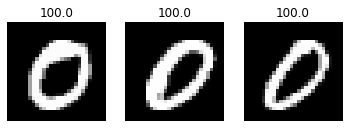

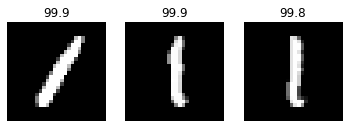

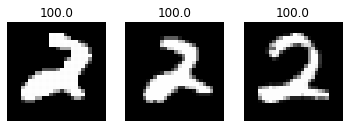

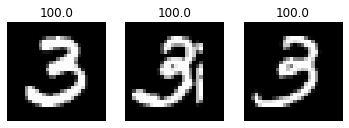

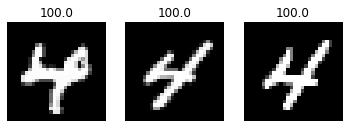

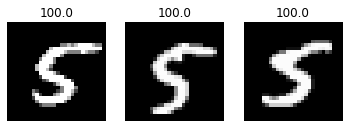

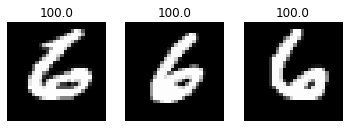

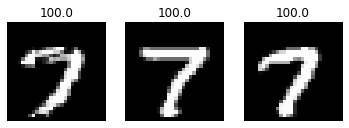

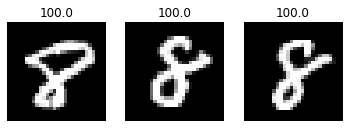

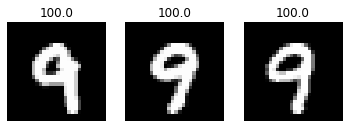

In [82]:
vis_top3_img_to_tensorboard(result, 0)
vis_top3_img_to_tensorboard(result, 1)
vis_top3_img_to_tensorboard(result, 2)
vis_top3_img_to_tensorboard(result, 3)
vis_top3_img_to_tensorboard(result, 4)
vis_top3_img_to_tensorboard(result, 5)
vis_top3_img_to_tensorboard(result, 6)
vis_top3_img_to_tensorboard(result, 7)
vis_top3_img_to_tensorboard(result, 8)
vis_top3_img_to_tensorboard(result, 9)

<AxesSubplot:>

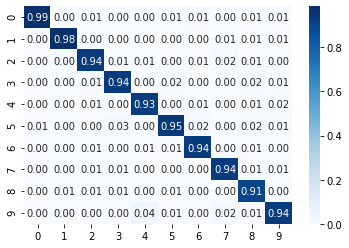

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

prob_list = model.predict(test_images)
pred_list =[]
for i in range(len(test_images)):
    pred_list.append(list(prob_list[i]).index(max(prob_list[i])))

result = confusion_matrix(pred_list, test_labels, normalize="pred")
sn.heatmap(result, annot=True, fmt='.2f', cmap="Blues")